In [2]:
from tqdm import tqdm
import random
import math
import time
import sys
sys.path.append("../")
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

from cachingalgo.full_observation.cost_min import CMSR, CMDR
from cachingalgo.request_generation.continuous import szipf

## Simulations of CMSR, CMDR, CMDRP and CMDRM

### Avg System Cost Vs No. of Requests

In [3]:
L = int(1e4)        # Library Size
totalreq = int(5e4) # Total no. of requests
C = 10

np.random.seed(32)
szdata = szipf(L = L , count = totalreq, a = 1.2)
# CMDRM
alg1 = CMDR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=5, Cost = [1, 0.1, 0.05, 0.025], cache_update='marg', seed = 7)
# CMDR
alg2 = CMDR(cache_size=C, L=L, beta=10, z=1.5, lambda_param=5, Cost=[1, 0.1, 0.05, 0.025], prob=szdata['prob'], C_hat = np.arange(C, dtype='int'), seed = 7)
# CMDR[L] Cache size is equal to library size
alg3 = CMDR(cache_size=L, L=L, beta=10, z=1.5, lambda_param=5, Cost=[1, 0.1, 0.05, 0.025], prob=szdata['prob'], C_hat = np.arange(L, dtype='int'), seed = 7)
# CMSR
alg4 = CMSR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=5, Cost = [1, 0.1, 0.05, 0.025], prob = szdata['prob'])
alg4cache = alg4.currcache()
# CMDRP
alg5 = CMDR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=5, Cost = [1, 0.1, 0.05, 0.025], cache_update='pop', seed = 7)

avg_sys_cost1 = np.zeros((totalreq,))
avg_sys_cost2 = alg2.avg_sys_cost(alg2.mu_hat)*np.ones((totalreq,))
avg_sys_cost3 = alg3.avg_sys_cost(alg3.mu_hat)*np.ones((totalreq,))
avg_sys_cost4 = alg4.avg_sys_cost(alg4.mu_hat)*np.ones((totalreq,))
avg_sys_cost5 = np.zeros((totalreq,))

for i, request in enumerate(tqdm(szdata['req'])):
    _ = alg1.currcache(request)
    avg_sys_cost1[i] = alg1.avg_sys_cost(alg1.mu_hat)
    
    _ = alg5.currcache(request)
    avg_sys_cost5[i] = alg5.avg_sys_cost(alg5.mu_hat)


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:59<00:00, 418.16it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


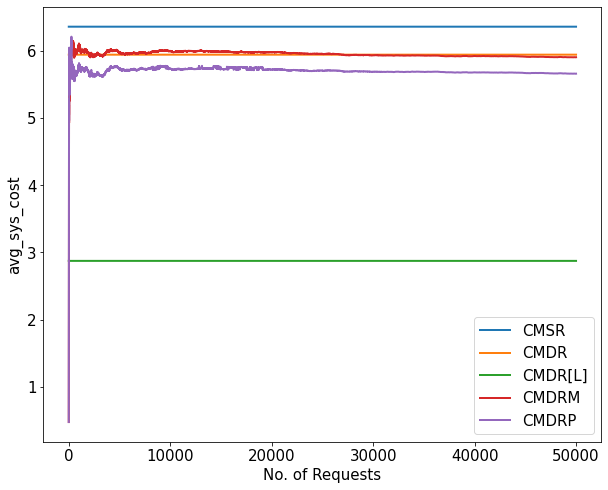

In [4]:
x = list(range(totalreq))
plt.figure(figsize=(10, 8))
plt.plot(x, avg_sys_cost4, label=r'CMSR', linewidth=2)
plt.plot(x, avg_sys_cost2, label=r'CMDR', linewidth=2)
plt.plot(x, avg_sys_cost3, label=r'CMDR[L]', linewidth=2)
plt.plot(x, avg_sys_cost1, label=r'CMDRM', linewidth=2)
plt.plot(x, avg_sys_cost5, label=r'CMDRP', linewidth=2)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("No. of Requests", fontsize=15)
plt.ylabel("avg_sys_cost", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("Zipf parameter = 1.2, RR parameter = 1.5 and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/allreqcost.eps")
plt.show()

### Avg System Cost Vs. Cache Size

In [5]:
L = int(1e4)        # Library Size
totalreq = int(5e4) # Total no. of requests
Cache_size = [10, 15, 20, 25, 30, 35, 40]

avg_sys_cost1 = np.zeros((len(Cache_size),))
avg_sys_cost2 = np.zeros((len(Cache_size),))
avg_sys_cost3 = np.zeros((len(Cache_size),))
avg_sys_cost4 = np.zeros((len(Cache_size),))
avg_sys_cost5 = np.zeros((len(Cache_size),))

hit_rate1 = np.zeros((len(Cache_size),))
hit_rate2 = np.zeros((len(Cache_size),))
hit_rate4 = np.zeros((len(Cache_size),))
hit_rate5 = np.zeros((len(Cache_size),))

szdata = szipf(L = L , count = totalreq, a = 1.2)

for itr, C in enumerate(tqdm(Cache_size)):
    # CMDRM
    alg1 = CMDR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=5, Cost = [1, 0.1, 0.05, 0.025], cache_update='marg', seed = 7)
    # CMDR
    alg2 = CMDR(cache_size=C, L=L, beta=10, z=1.5, lambda_param=5, Cost=[1, 0.1, 0.05, 0.025], prob=szdata['prob'], C_hat = np.arange(C, dtype='int'), seed = 7)
    avg_sys_cost2[itr] = alg2.avg_sys_cost(alg2.mu_hat)
    # CMDR[L] Cache size is equal to library size
    alg3 = CMDR(cache_size=L, L=L, beta=10, z=1.5, lambda_param=5, Cost=[1, 0.1, 0.05, 0.025], prob=szdata['prob'], C_hat = np.arange(L, dtype='int'), seed = 7)
    avg_sys_cost3[itr] = alg3.avg_sys_cost(alg3.mu_hat)
    # CMSR
    alg4 = CMSR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=5, Cost = [1, 0.1, 0.05, 0.025], prob = szdata['prob'])
    alg4cache = alg4.currcache()
    avg_sys_cost4[itr] = alg4.avg_sys_cost(alg4.mu_hat)
    # CMDRP
    alg5 = CMDR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=5, Cost = [1, 0.1, 0.05, 0.025], cache_update='pop', seed = 7)


    for i, request in enumerate(szdata['req']):
        
        if request in alg1.C_hat:
            hit_rate1[itr] += 1
        _ = alg1.currcache(request)
        avg_sys_cost1[itr] = alg1.avg_sys_cost(alg1.mu_hat)
        
        if request in alg2.C_hat:
            hit_rate2[itr] += 1
            
        if request in alg4.C_hat:
            hit_rate4[itr] += 1
            
        if request in alg5.C_hat:
            hit_rate5[itr] += 1
        _ = alg5.currcache(request)
        avg_sys_cost5[itr] = alg5.avg_sys_cost(alg5.mu_hat)

hit_rate1 = hit_rate1/totalreq
hit_rate2 = hit_rate2/totalreq
hit_rate4 = hit_rate4/totalreq
hit_rate5 = hit_rate5/totalreq

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [15:28<00:00, 132.71s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


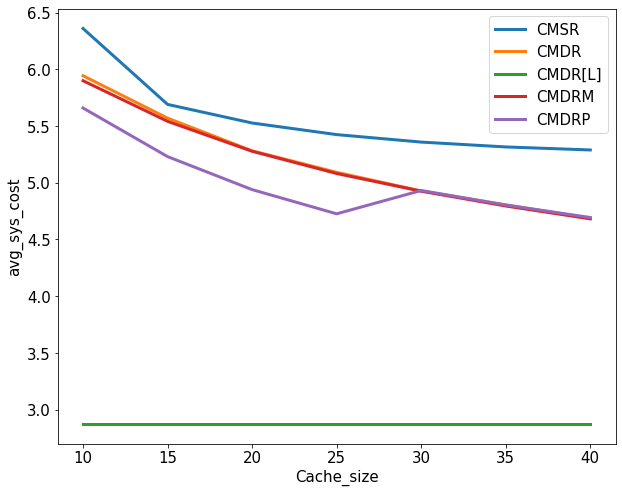

In [6]:
x = Cache_size
plt.figure(figsize=(10, 8))
plt.plot(x, avg_sys_cost4, label=r'CMSR', linewidth=3)
plt.plot(x, avg_sys_cost2, label=r'CMDR', linewidth=3)
plt.plot(x, avg_sys_cost3, label=r'CMDR[L]', linewidth=3)
plt.plot(x, avg_sys_cost1, label=r'CMDRM', linewidth=3)
plt.plot(x, avg_sys_cost5, label=r'CMDRP', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("Cache_size", fontsize=15)
plt.ylabel("avg_sys_cost", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("Zipf parameter = 1.2 and RR parameter = 1.5")
plt.savefig("../plots/full_observation/cost_minimization/copy/allcachecost.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


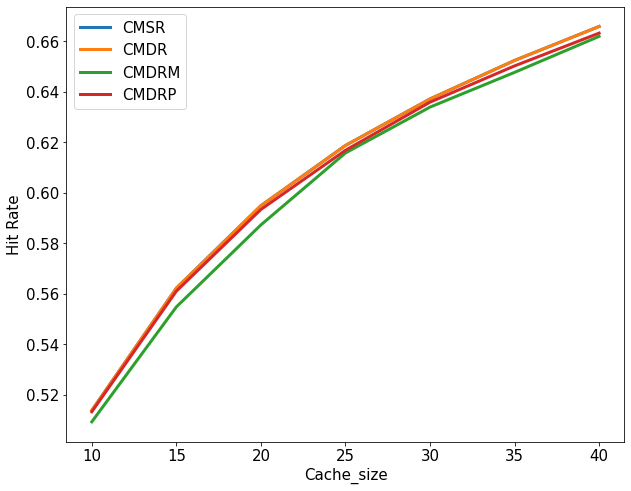

In [7]:
x = Cache_size
plt.figure(figsize=(10, 8))
plt.plot(x, hit_rate4, label=r'CMSR', linewidth=3)
plt.plot(x, hit_rate2, label=r'CMDR', linewidth=3)
plt.plot(x, hit_rate1, label=r'CMDRM', linewidth=3)
plt.plot(x, hit_rate5, label=r'CMDRP', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("Cache_size", fontsize=15)
plt.ylabel("Hit Rate", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("Zipf parameter = 1.2 and RR parameter = 1.5")
plt.savefig("../plots/full_observation/cost_minimization/copy/allcachehit.eps")
plt.show()

### Cost Reduction plot of CMSR, CMDR, CMDRM, CMDRP

#### For varying Refresh Rate parameters

In [8]:
L = int(1e4)        # Library Size
totalreq = int(5e4) # Total no. of requests

np.random.seed(7)

C = 10 # Cache Size
lambda_param = [1, 5, 10]
z_param = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

szdata = szipf(L = L , count = totalreq, a = 1.2)

avg_sys_cost_alg1 = np.zeros((len(lambda_param), len(z_param)))
avg_sys_cost_alg2 = np.zeros((len(lambda_param), len(z_param)))
avg_sys_cost_alg4 = np.zeros((len(lambda_param), len(z_param)))
avg_sys_cost_alg5 = np.zeros((len(lambda_param), len(z_param)))
avg_sys_cost_algP = np.zeros((len(lambda_param), len(z_param)))

cost_red1 = np.zeros((len(lambda_param), len(z_param)))
cost_red2 = np.zeros((len(lambda_param), len(z_param)))
cost_red4 = np.zeros((len(lambda_param), len(z_param)))
cost_red5 = np.zeros((len(lambda_param), len(z_param)))

for itrz, z in enumerate(tqdm(z_param)):
    for itrl, lam in enumerate(lambda_param):
        # CMDRM
        alg1 = CMDR(cache_size=C, L = L, beta=10, z=z, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], cache_update='marg', seed = 7)
        # CMDR
        alg2 = CMDR(cache_size=C, L=L, beta=10, z=z, lambda_param=lam, Cost=[1, 0.1, 0.05, 0.025], prob=szdata['prob'], C_hat = np.arange(C, dtype='int'), seed = 7)
        avg_sys_cost2 = alg2.avg_sys_cost(alg2.mu_hat)
        # CMSR
        alg4 = CMSR(cache_size=C, L = L, beta=10, z=z, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], prob = szdata['prob'])
        alg4cache = alg4.currcache()
        avg_sys_cost4 = alg4.avg_sys_cost(alg4.mu_hat)
        # CMDRP
        alg5 = CMDR(cache_size=C, L = L, beta=10, z=z, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], cache_update='pop', seed = 7)
        
        # BaseLine
        algP = CMSR(cache_size=C, L = L, beta=10, z=z, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], prob = szdata['prob'])
        algP.C_hat = np.arange(C, dtype='int')
        algP.mu_hat = algP.minimize_cost()
        avg_sys_costP = algP.avg_sys_cost(algP.mu_hat)


        for i, request in enumerate(szdata['req']):
            _ = alg1.currcache(request)
            avg_sys_cost1 = alg1.avg_sys_cost(alg1.mu_hat)

            _ = alg5.currcache(request)
            avg_sys_cost5 = alg5.avg_sys_cost(alg5.mu_hat)
            
        avg_sys_cost_alg1[itrl, itrz] = avg_sys_cost1
        avg_sys_cost_alg2[itrl, itrz] = avg_sys_cost2
        avg_sys_cost_alg4[itrl, itrz] = avg_sys_cost4
        avg_sys_cost_alg5[itrl, itrz] = avg_sys_cost5
        avg_sys_cost_algP[itrl, itrz] = avg_sys_costP
            
        
        cost_red1[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost1)/(avg_sys_costP))
        cost_red2[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost2)/(avg_sys_costP))
        cost_red4[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost4)/(avg_sys_costP))
        cost_red5[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost5)/(avg_sys_costP))

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [52:12<00:00, 348.03s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


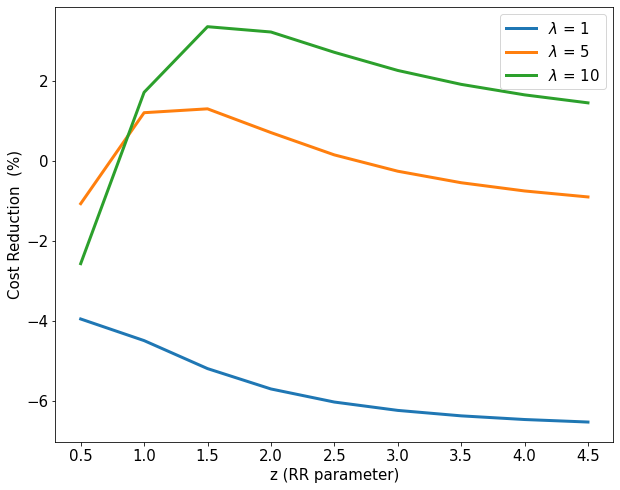

In [9]:
x = z_param
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red1[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red1[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red1[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("z (RR parameter)", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMDRM and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMDRMz.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


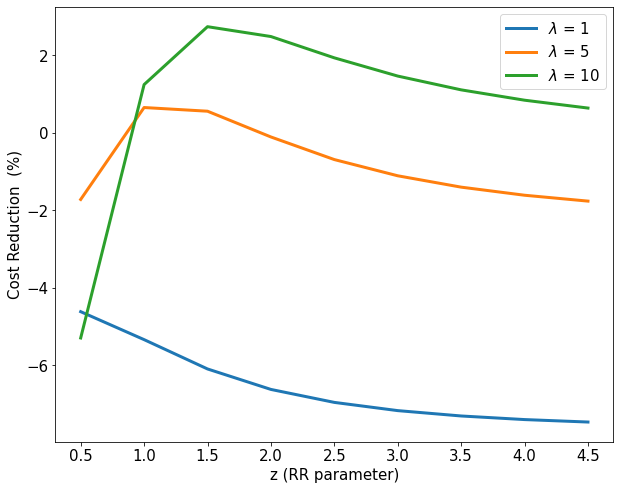

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red2[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red2[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red2[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("z (RR parameter)", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMDR and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMDRz.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


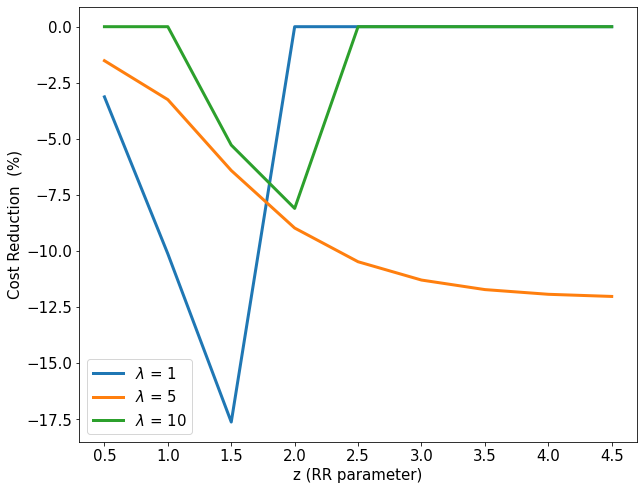

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red4[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red4[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red4[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("z (RR parameter)", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMSR and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMSRz.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


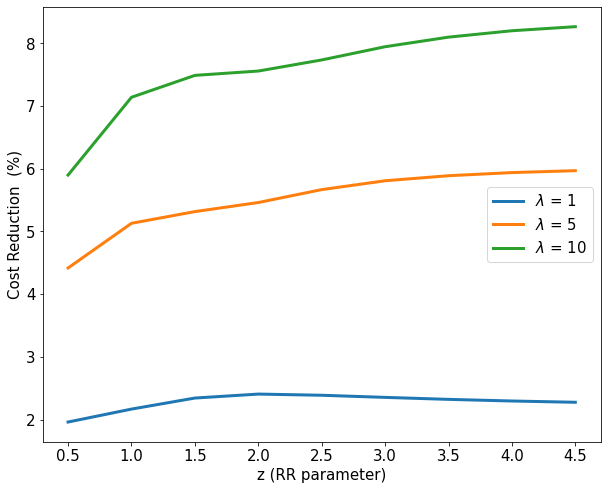

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red5[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red5[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red5[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("z (RR parameter)", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMDRUPo and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMDRPz.eps")
plt.show()

#### For Varying zipf parameter

In [18]:
L = int(1e4)        # Library Size
totalreq = int(5e4) # Total no. of requests

np.random.seed(7)

C = 10 # Cache Size
lambda_param = [1, 5, 10]
zipf_param = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

cost_red1 = np.zeros((len(lambda_param), len(zipf_param)))
cost_red2 = np.zeros((len(lambda_param), len(zipf_param)))
cost_red4 = np.zeros((len(lambda_param), len(zipf_param)))
cost_red5 = np.zeros((len(lambda_param), len(zipf_param)))

avg_sys_cost_alg1 = np.zeros((len(lambda_param), len(zipf_param)))
avg_sys_cost_alg2 = np.zeros((len(lambda_param), len(zipf_param)))
avg_sys_cost_alg4 = np.zeros((len(lambda_param), len(zipf_param)))
avg_sys_cost_alg5 = np.zeros((len(lambda_param), len(zipf_param)))
avg_sys_cost_algP = np.zeros((len(lambda_param), len(zipf_param)))

for itrz, z in enumerate(tqdm(zipf_param)):
    szdata = szipf(L = L , count = totalreq, a = z)
    for itrl, lam in enumerate(lambda_param):
        # CMDRM
        alg1 = CMDR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], cache_update='marg', seed = 7)
        # CMDR
        alg2 = CMDR(cache_size=C, L=L, beta=10, z=1.5, lambda_param=lam, Cost=[1, 0.1, 0.05, 0.025], prob=szdata['prob'], C_hat = np.arange(C, dtype='int'), seed = 7)
        avg_sys_cost2 = alg2.avg_sys_cost(alg2.mu_hat)
        # CMSR
        alg4 = CMSR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], prob = szdata['prob'])
        alg4cache = alg4.currcache()
        avg_sys_cost4 = alg4.avg_sys_cost(alg4.mu_hat)
        # CMDRP
        alg5 = CMDR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], cache_update='pop', seed = 7)
        
        # BaseLine
        algP = CMSR(cache_size=C, L = L, beta=10, z=1.5, lambda_param=lam, Cost = [1, 0.1, 0.05, 0.025], prob = szdata['prob'])
        algP.C_hat = np.arange(C, dtype='int')
        algP.mu_hat = algP.minimize_cost()
        avg_sys_costP = algP.avg_sys_cost(algP.mu_hat)


        for i, request in enumerate(szdata['req']):
            _ = alg1.currcache(request)
            avg_sys_cost1 = alg1.avg_sys_cost(alg1.mu_hat)

            _ = alg5.currcache(request)
            avg_sys_cost5 = alg5.avg_sys_cost(alg5.mu_hat)
            
        avg_sys_cost_alg1[itrl, itrz] = avg_sys_cost1
        avg_sys_cost_alg2[itrl, itrz] = avg_sys_cost2
        avg_sys_cost_alg4[itrl, itrz] = avg_sys_cost4
        avg_sys_cost_alg5[itrl, itrz] = avg_sys_cost5
        avg_sys_cost_algP[itrl, itrz] = avg_sys_costP
            
        
        cost_red1[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost1)/(avg_sys_costP))
        cost_red2[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost2)/(avg_sys_costP))
        cost_red4[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost4)/(avg_sys_costP))
        cost_red5[itrl, itrz] = 100*((avg_sys_costP-avg_sys_cost5)/(avg_sys_costP))

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [40:19<00:00, 302.43s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


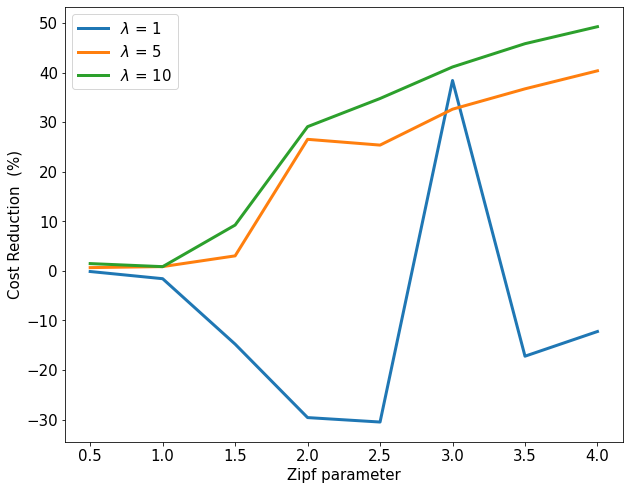

In [19]:
x = zipf_param
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red1[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red1[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red1[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("Zipf parameter", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMDRUMarg and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMDRMzipf.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


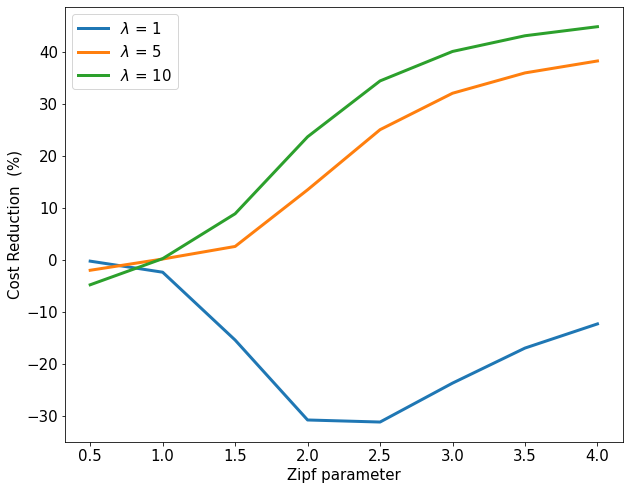

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red2[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red2[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red2[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("Zipf parameter", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMDR and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMDRzipf.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


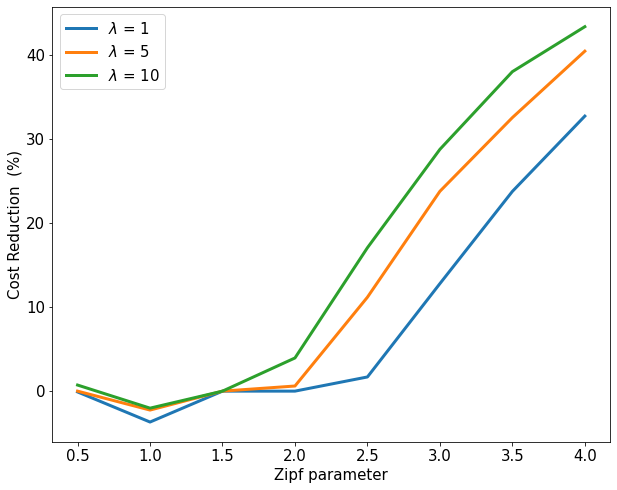

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red4[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red4[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red4[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("Zipf parameter", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMSR and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMSRzipf.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


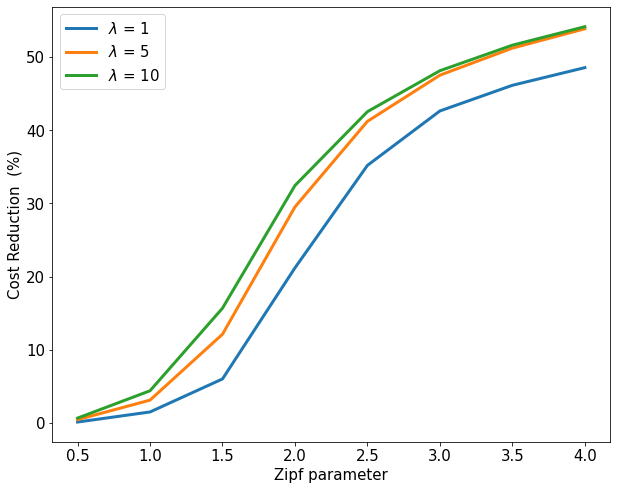

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(x, cost_red5[0,:], label=r'$\lambda$ = 1', linewidth=3)
plt.plot(x, cost_red5[1,:], label=r'$\lambda$ = 5', linewidth=3)
plt.plot(x, cost_red5[2,:], label=r'$\lambda$ = 10', linewidth=3)
plt.legend(loc='best',  prop={"size":15})
plt.xlabel("Zipf parameter", fontsize=15)
plt.ylabel("Cost Reduction  (%)", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title("CMDRUPop and Cache Size = 10")
plt.savefig("../plots/full_observation/cost_minimization/copy/CMDRPzipf.eps")
plt.show()